# Movie Recommendarion

## Data Collecting

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None)

movies_data = pd.read_csv("title.basics.tsv",sep='\t', on_bad_lines='skip', low_memory=False)

ratings_data = pd.read_csv('title.ratings.tsv', delimiter='\t')

# Merge the datasets based on the 'tconst' column
movies_data = pd.merge(movies_data, ratings_data[['tconst', 'averageRating', 'numVotes']], on='tconst', how='left')

movies_data.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,2036.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.7,272.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1984.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.4,178.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2744.0
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short,5.0,183.0
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport",5.4,852.0
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short",5.4,2181.0
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,209.0
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short",6.8,7502.0


In [3]:
movies_data.drop(['originalTitle', 'endYear'], axis=1)

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short",5.7,2036.0
1,tt0000002,short,Le clown et ses chiens,0,1892,5,"Animation,Short",5.7,272.0
2,tt0000003,short,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance",6.5,1984.0
3,tt0000004,short,Un bon bock,0,1892,12,"Animation,Short",5.4,178.0
4,tt0000005,short,Blacksmith Scene,0,1893,1,"Comedy,Short",6.2,2744.0
...,...,...,...,...,...,...,...,...,...
10807103,tt9916848,tvEpisode,Episode #3.17,0,2009,\N,"Action,Drama,Family",NaN,NaN
10807104,tt9916850,tvEpisode,Episode #3.19,0,2010,\N,"Action,Drama,Family",NaN,NaN
10807105,tt9916852,tvEpisode,Episode #3.20,0,2010,\N,"Action,Drama,Family",NaN,NaN
10807106,tt9916856,short,The Wind,0,2015,27,Short,NaN,NaN


## Data Analysis

Distribution of movie types (titleType): Show the frequency of each type of title (e.g., movie, TV series) to understand the composition of the dataset.

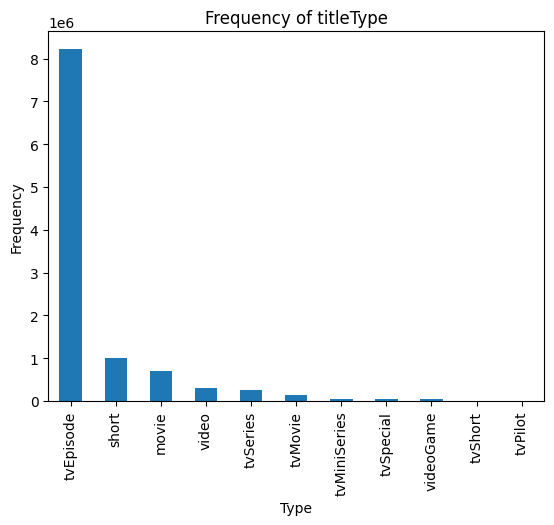

In [3]:
# Count the frequency of each titleType
title_type_counts = movies_data['titleType'].value_counts()

# Plot the bar chart
title_type_counts.plot(kind='bar')

# Add titles and labels
plt.title('Frequency of titleType')
plt.xlabel('Type')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Distribution of genres: Plot a bar chart showing the frequency of each genre to identify popular genres in the dataset.

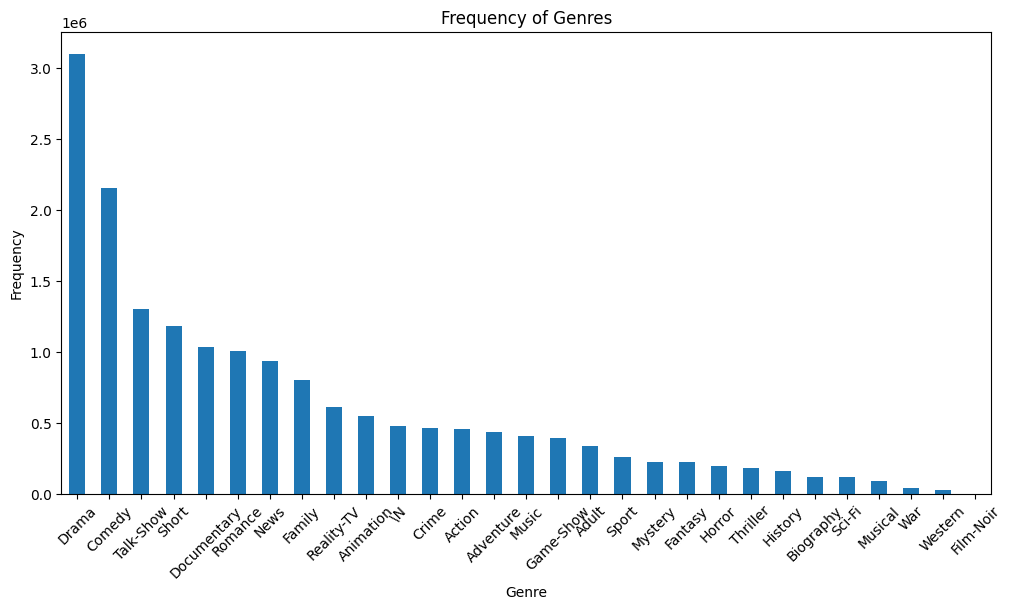

In [4]:
# Split the lists of genres and stack them into separate rows
genre_counts = movies_data['genres'].str.split(',').explode().value_counts()

# Create a wider plot
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot the bar chart
genre_counts.plot(kind='bar')

# Add titles and labels
plt.title('Frequency of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

Box plot of numerical features: Visualize summary statistics such as median, quartiles, and outliers for numerical features like startYear, endYear, and runtimeMinutes.

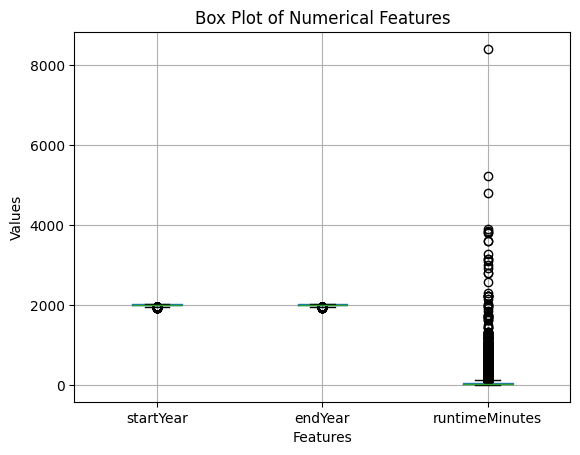

In [5]:
# Select the numerical columns for the box plot
numerical_features = ['startYear', 'endYear', 'runtimeMinutes']

# Convert selected columns to numeric type
movies_data[numerical_features] = movies_data[numerical_features].apply(pd.to_numeric, errors='coerce')

# Remove rows with missing values in the selected numerical columns
movies_data_cleaned = movies_data[numerical_features].dropna()

# Create a box plot
movies_data_cleaned.boxplot()

# Add titles and labels
plt.title('Box Plot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.show()

Trend of movie releases over time: Plot the number of movies released each year to observe trends and patterns in movie releases over time.

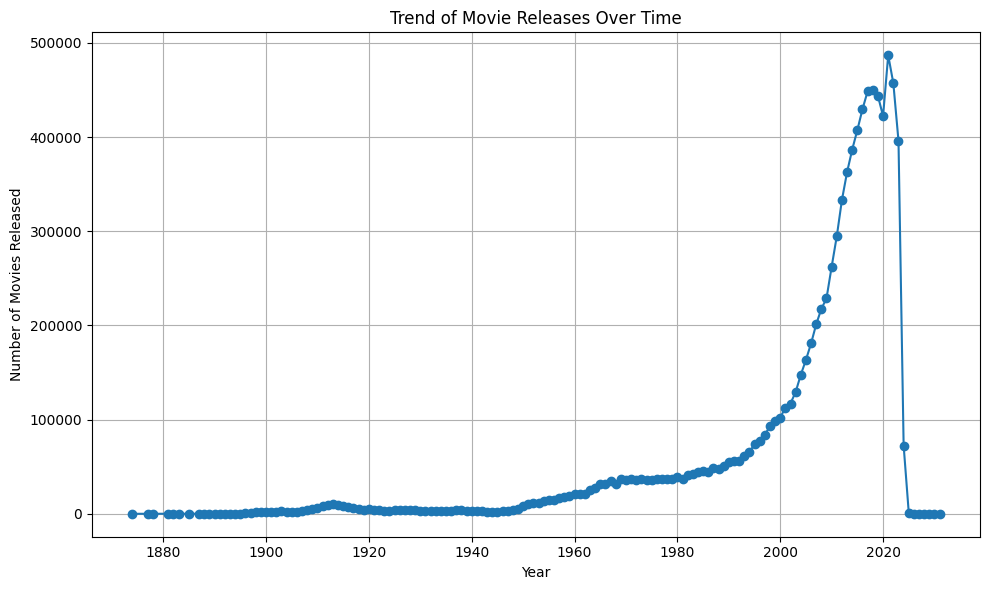

In [6]:
# Convert 'startYear' column to numeric and drop rows with missing values
movies_data['startYear'] = pd.to_numeric(movies_data['startYear'], errors='coerce').dropna()

# Group the data by 'startYear' and count the number of movies released each year
movies_per_year = movies_data.groupby('startYear').size()

# Plot the trend of movie releases over time
movies_per_year.plot(kind='line', marker='o', figsize=(10, 6))  # Adjust the figure size as needed

# Add titles and labels
plt.title('Trend of Movie Releases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')

# Show the plot
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Proportion of adult movies: If applicable, show the proportion of adult movies compared to non-adult movies using a pie chart.

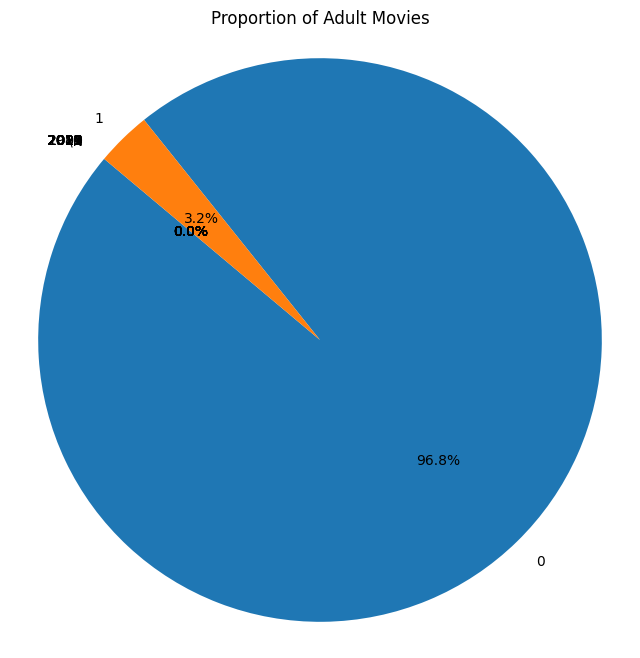

In [7]:
# Count the frequency of adult movies
adult_counts = movies_data['isAdult'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(adult_counts, labels=adult_counts.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Proportion of Adult Movies')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Pair plot of numerical features: If there are multiple numerical features, use pair plots to visualize pairwise relationships between them and identify potential patterns or correlations.

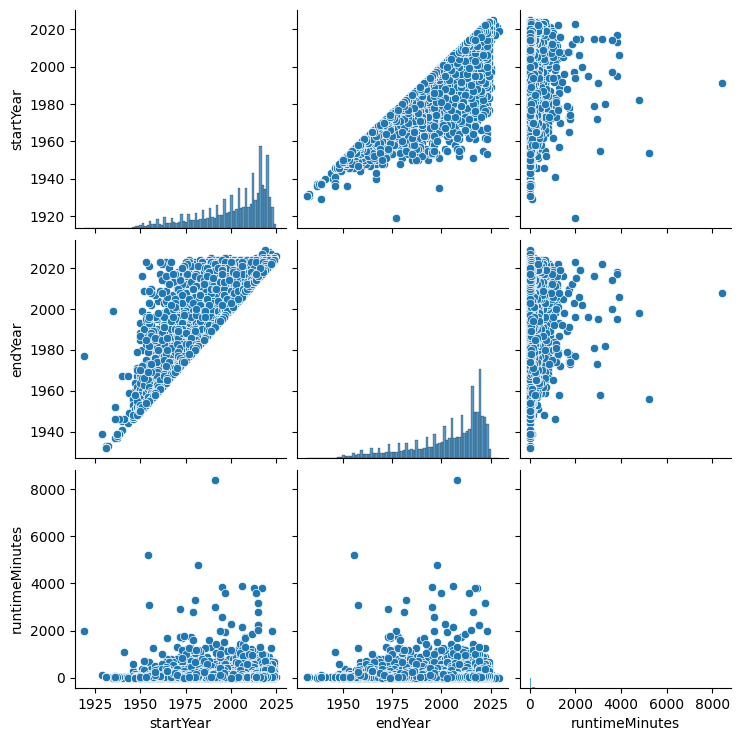

In [8]:
# Select the numerical columns for the pair plot
numerical_features = ['startYear', 'endYear', 'runtimeMinutes']

# Drop rows with missing values in the selected numerical columns
movies_data_cleaned = movies_data[numerical_features].dropna()

# Create a pair plot
sns.pairplot(movies_data_cleaned)

# Show the plot
plt.show()


Correlation heatmap: Visualize the correlation matrix between numerical features (e.g., startYear, runtimeMinutes) to identify relationships between variables.

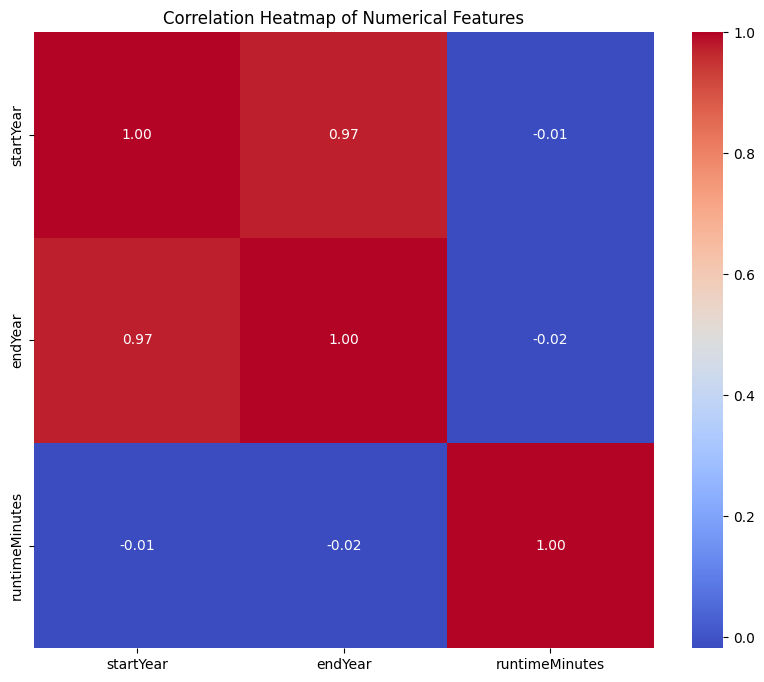

In [9]:
# Select the numerical columns for the correlation heatmap
numerical_features = ['startYear', 'endYear', 'runtimeMinutes']

# Drop rows with missing values in the selected numerical columns
movies_data_cleaned = movies_data[numerical_features].dropna()

# Calculate the correlation matrix
correlation_matrix = movies_data_cleaned.corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Heatmap of Numerical Features')

# Show the plot
plt.show()


Scatter plot of startYear vs. runtimeMinutes: Plot startYear on the x-axis and runtimeMinutes on the y-axis to explore the relationship between the release year and the duration of movies.

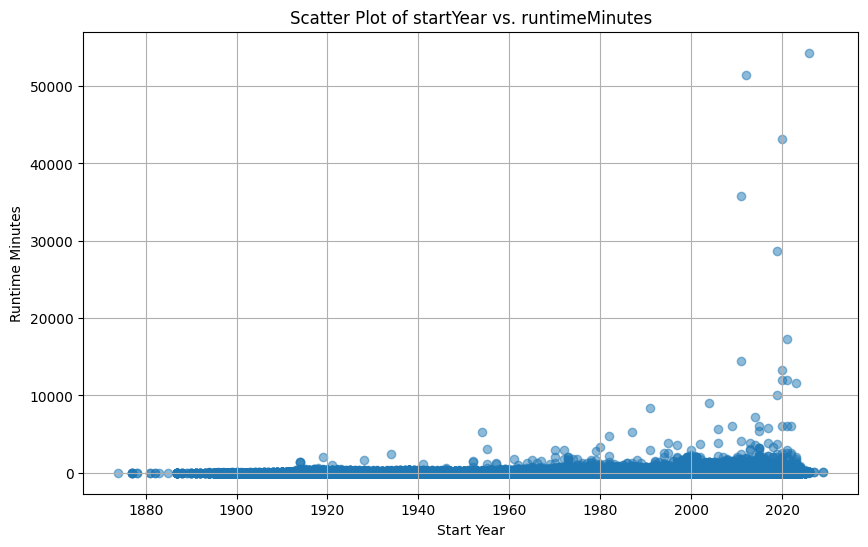

In [10]:
# Select the columns for the scatter plot
start_year = movies_data['startYear']
runtime_minutes = movies_data['runtimeMinutes']

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(start_year, runtime_minutes, alpha=0.5)

# Add title and labels
plt.title('Scatter Plot of startYear vs. runtimeMinutes')
plt.xlabel('Start Year')
plt.ylabel('Runtime Minutes')

# Show the plot
plt.grid(True)  # Add gridlines for better readability
plt.show()

# Data Cleaning and Proccessing

Understanding the distribution of missing values in your dataset is crucial for data analysis. The following code snippet uses seaborn's heatmap to visually represent the presence of null values in each column of the DataFrame, facilitating quick insights into the data's completeness.

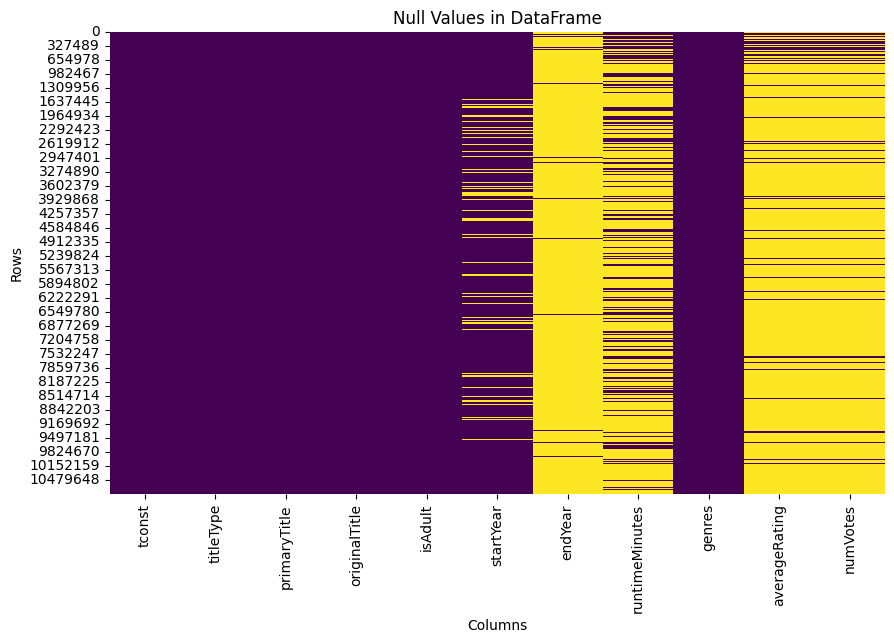

In [11]:
# Create a boolean DataFrame indicating the presence of null values
null_matrix = movies_data.isnull()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(null_matrix, cmap='viridis', cbar=False)
plt.title('Null Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [39]:
movies_data.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,2036.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.7,272.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1984.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.4,178.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2744.0
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short,5.0,183.0
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport",5.4,852.0
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short",5.4,2181.0
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,209.0
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short",6.8,7502.0


In [19]:
movies_data.fillna({'startYear': 0.0, 'averageRating': 0.0, 'numVotes': 0}, inplace=True)

# Replace all occurrences of "/N" with 0.0 in the entire dataset
movies_data.replace("/N", 0.0, inplace=True)
movies_data.replace("\\N", 0.0, inplace=True)
movies_data.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,watched
0,tt0000001,short,Carmencita,Carmencita,0,1894,0.0,1,"Documentary,Short",5.7,2036.0,0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,0.0,5,"Animation,Short",5.7,272.0,0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,0.0,4,"Animation,Comedy,Romance",6.5,1984.0,1
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,0.0,12,"Animation,Short",5.4,178.0,0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,0.0,1,"Comedy,Short",6.2,2744.0,1
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,0.0,1,Short,5.0,183.0,0
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,0.0,1,"Short,Sport",5.4,852.0,0
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,0.0,1,"Documentary,Short",5.4,2181.0,0
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,0.0,45,Romance,5.3,209.0,0
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,0.0,1,"Documentary,Short",6.8,7502.0,1


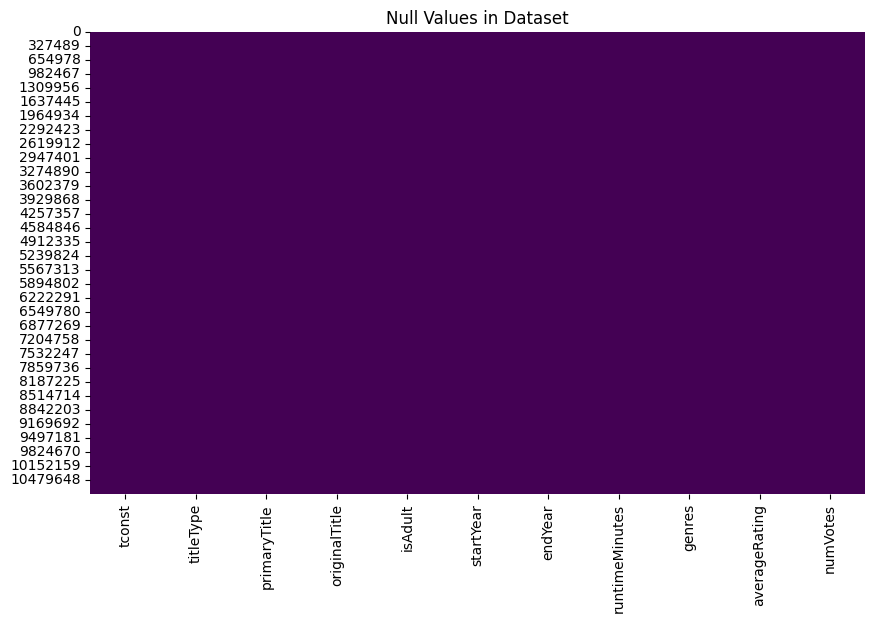

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(movies_data.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values in Dataset')
plt.show()

This code snippet creates a binary target variable 'watched' to indicate whether a movie is considered "watched" or "not watched" based on a popularity threshold. The threshold is defined by the minimum number of views for each movie.

In [17]:
rating_threshold = 6.0  # Minimum rating threshold to consider a movie as watched
votes_threshold = 1000  # Minimum number of votes to consider a movie as watched

# Define a function to set the 'watched' column based on rating and number of votes
def set_watched(row):
    # Convert 'averageRating' and 'numVotes' values to float if they are not already
    rating = float(row['averageRating'])
    votes = float(row['numVotes'])
    
    # Check if rating and number of votes meet the thresholds
    if rating >= rating_threshold and votes >= votes_threshold:
        return 1  # Considered as watched
    else:
        return 0  # Not watched

# Apply the function to set the 'watched' column
movies_data['watched'] = movies_data.apply(set_watched, axis=1)

movies_data.dropna(inplace=True)

# Display the first few rows of the DataFrame with the updated 'watched' column
movies_data.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,watched
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,2036.0,0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.7,272.0,0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1984.0,1
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.4,178.0,0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2744.0,1
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short,5.0,183.0,0
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport",5.4,852.0,0
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short",5.4,2181.0,0
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,209.0,0
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short",6.8,7502.0,1


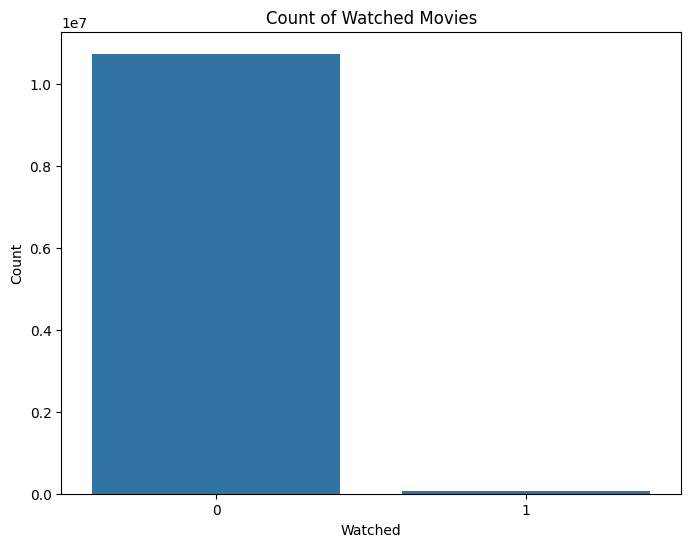

In [11]:
# Plot the count of 'watched' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='watched', data=movies_data)
plt.title('Count of Watched Movies')
plt.xlabel('Watched')
plt.ylabel('Count')
plt.show()

# Model Building: Mapping Movie Features for Recommendation

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convert 'startYear' column to float
movies_data['startYear'] = movies_data['startYear'].astype(float)

# Convert 'genres' column to string
movies_data['genres'] = movies_data['genres'].astype(str)

# Selecting features and target variable
X = movies_data[['startYear', 'genres']].copy()  # Features (make a copy to avoid SettingWithCopyWarning)
y = movies_data['watched']  # Target variable

# Encode the 'genres' column using LabelEncoder
label_encoder = LabelEncoder()
X.loc[:, 'genres'] = label_encoder.fit_transform(X['genres'])  # Use .loc to assign values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy: 0.9935560732205523
